# Comprehensive Analysis of Hospital Mortality

In [29]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer

## Basic Analysis and understanding of the data

In [2]:
#Load the dataset
df = pd.read_csv(r"D:\DSML class\Real world data assignments\Python\Mortatlity Analysis\Hospital Mortality Analysis.csv")

## Observation of the data

In [3]:
print('\nFirst five rows of the dataset')
df.head(5)


First five rows of the dataset


,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
0,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737
1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077
2,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667
3,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154
4,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000


In [4]:
df.shape

(1177, 20)

In [5]:
#Getting the overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1177 non-null   int64  
 1   outcome                   1176 non-null   float64
 2   age                       1177 non-null   int64  
 3   gender                    1177 non-null   int64  
 4   BMI                       962 non-null    float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [6]:
#Checking the summary of numerical columns in the table
df.describe()

,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SPO2
count,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000
mean,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900
std,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002
min,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667
25%,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000
50%,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273
75%,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500
max,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000


In [7]:
#Unique values and it's count unique of categorical columns
print('\nUnique values of categorical columns in admissions table')
(df.select_dtypes(include='object')).nunique()


Unique values of categorical columns in admissions table


Series([], dtype: float64)

## Data Processing

In [8]:
#Checking for missing values
df.isna().sum()

ID                            0
outcome                       1
age                           0
gender                        0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SPO2                         13
dtype: int64

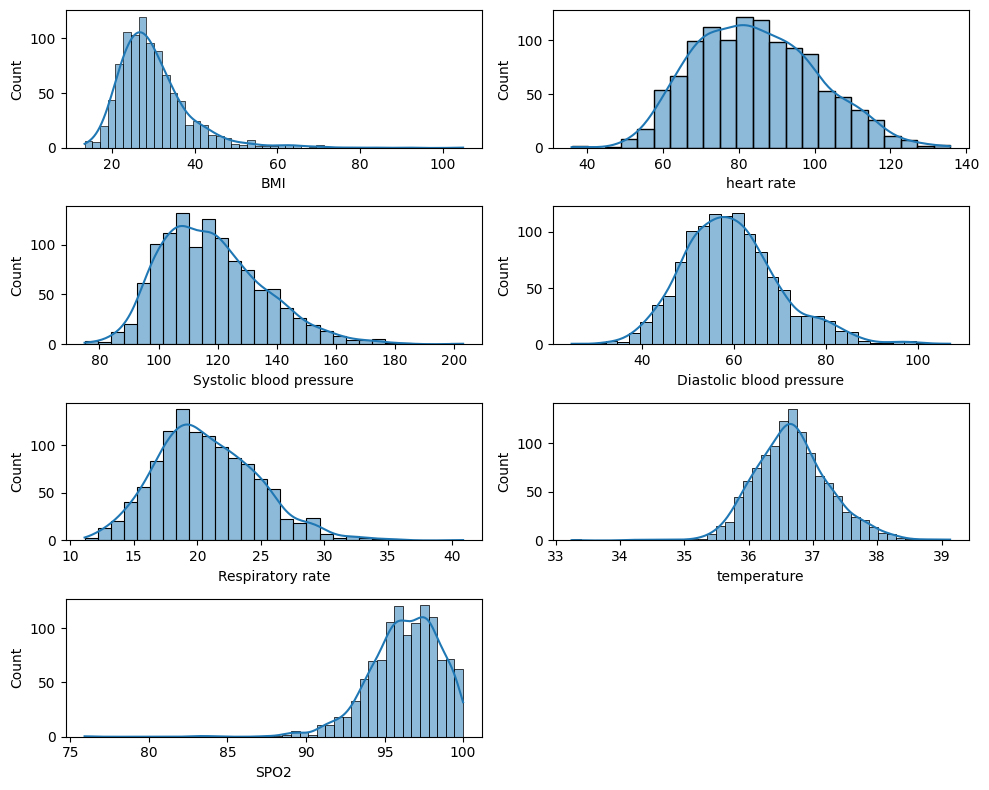

In [9]:
# Checking the distribution of the missing columns
missing_columns = ['BMI', 'heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SPO2']
plt.figure(figsize=(10,8))
for i, column in enumerate (missing_columns, 1):
    plt.subplot(4,2,i)
    sns.histplot(df[column], kde=True)
    plt.xlabel=column
plt.tight_layout()
plt.show()

#### Observation:
- Almost all the missing columns are normally distibuted and hence we can use mean to replace the missing values.

In [34]:
#Missing value treatment
imp = SimpleImputer()
for column in missing_columns:
    df[column] = pd.DataFrame(imp.fit_transform(pd.DataFrame(df[column])))

In [35]:
df.isna().sum()

ID                          0
outcome                     1
age                         0
gender                      0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SPO2                        0
dtype: int64